# Animated plots in Jupyter sessions served via the MyBinder.org system

For best results use the classic notebook interface and not JupyterLab. This will default to that. If you happend to be using this elsewhere in JupyterLab, you can switch the end of the url from `lab` to `tree` to get back to classic.

---- 

## My current approach

### basics

<IPython.core.display.Javascript object>


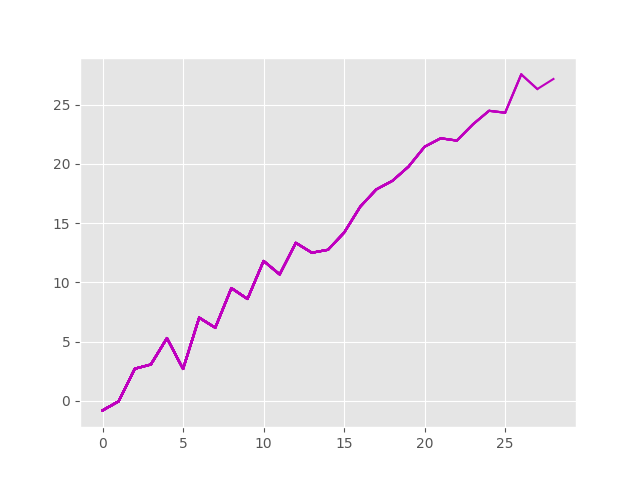

In [1]:
%matplotlib notebook
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # as noted at https://github.com/widdowquinn/Teaching-Data-Visualisation/blob/master/exercises/one_variable_continuous/one_variable_continuous.ipynb "Even if you do not explicitly plot using seaborn as sns, importing it causes style changes from the matplotlib defaults."
import time

x = np.arange(30)
y = [float(x_i + np.random.randn(1)) for x_i in x]


plt.style.use('ggplot')

def makeplot(ax, indx):
    ax.plot(x[:indx], y[:indx], '-', c="m") #matplot has a short list of color, 'm' is for magenta
    fig.canvas.draw()


fig, ax = plt.subplots()

for indx,_ in enumerate(x):
    makeplot(ax, indx)
    time.sleep(0.2)

### Current approach refined

Make it less jumpy by controlling size of axis.

<IPython.core.display.Javascript object>


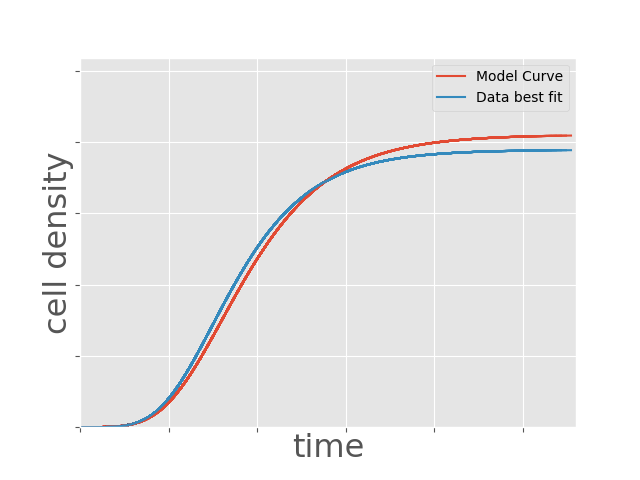

In [3]:
%matplotlib notebook

import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from collections import OrderedDict
import seaborn as sns # as noted at https://github.com/widdowquinn/Teaching-Data-Visualisation/blob/master/exercises/one_variable_continuous/one_variable_continuous.ipynb "Even if you do not explicitly plot using seaborn as sns, importing it causes style changes from the matplotlib defaults."
import time

import warnings
warnings.filterwarnings('ignore')

# Let's create a function to model and create data
def gompertz_function(x, a,b,c):
    #a = upper asymptote
    #b = negative = x axis displacement
    #c = negative = growth rate
    return a*(np.exp(-b*(np.exp(-c*x))))

x_points = 100

# Generating clean data
x = np.linspace(0, 28, x_points)
y = gompertz_function(x, 4.1, 11.1, 0.3)

# Adding noise to the data
noise_f = 1.092
yn = y + noise_f * np.random.normal(size=len(x))



plt.style.use('ggplot')

def makeplot(ax, indx):
    # Plot out the current state of the data and model
    ax.plot(x[:indx], y[:indx], c="C0", label='Model Curve')
    #plt.scatter(x,yn, color='#34495e', alpha = 0.7, label='Noisy Curve')
    ax.set_xlim(min(x), max(x))
    ax.set_ylim(0, max(y)+ noise_f) #plt.ylim(min(yn), max(yn))
    ax.set_xlabel("time",size = 23)
    ax.set_ylabel("cell density",size = 23)

    # Executing curve_fit on noisy data
    popt, pcov = curve_fit(gompertz_function, x, yn)
    ym = gompertz_function(x, *popt)
    plt.plot(x[:indx], ym[:indx], c='C1', label='Data best fit') 

    #cannot use `ax.legend(loc='best')` or repeats label every iteration;
    #legend not repeating and building based on https://stackoverflow.com/a/13589144/8508004
    handles, labels = plt.gca().get_legend_handles_labels()
    by_label = OrderedDict(zip(labels, handles))
    ax.legend(by_label.values(), by_label.keys(), loc='best')
    # hide actual numbers here since not really pertinent in demo
    ax.tick_params(labelbottom=False, labelleft=False) # hiding actual numbers based on https://stackoverflow.com/a/26428792/8508004


    fig.canvas.draw()


fig, ax = plt.subplots()

for indx,_ in enumerate(x):
    makeplot(ax, indx)
    time.sleep(0.2)

### Current approach applied for multiple plots (subplots)

(See [here](https://groups.google.com/d/msg/vpython-users/0Iig4CvvV0U/vaU9G0odAwAJ) for related post.)

Note that the main difference is the addition of ravel and the limit and label methods are slightly different. 

<IPython.core.display.Javascript object>


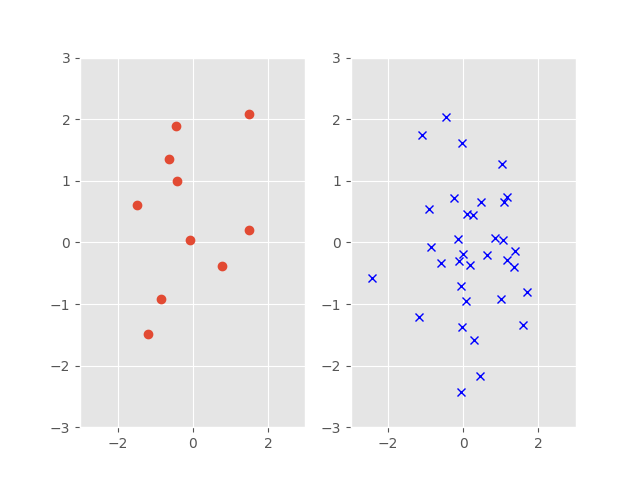

In [4]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import time


plt.style.use('ggplot')

def makeplots(ax1, ax2):
    ax1.clear()
    ax1.set_xlim(-3,3)
    ax1.set_ylim(-3,3)
    x, y = np.random.normal(size=(2, 10))
    ax1.plot(x, y, 'o')

    ax2.clear()
    ax2.set_xlim(-3,3)
    ax2.set_ylim(-3,3)
    i, j = np.random.normal(size=(2, 35))
    ax2.plot(i, j, 'x', c="b")

    fig.canvas.draw() 


fig, axes = plt.subplots(ncols=2, nrows=1)
ax1, ax2 = axes.ravel()


for f in range(10):
    makeplots(ax1, ax2)
    time.sleep(0.5)

-----

## Other options

This code sligthly modified from [here](https://stackoverflow.com/a/28077104/8508004) works. Although it seems to take a bit of time (like a minute??) to start the first time?

```python
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)
```


There is also this although it seems outdated in regards to playing the animation directly in the Jupyter notebook page as shown by the last example.
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/




<IPython.core.display.Javascript object>


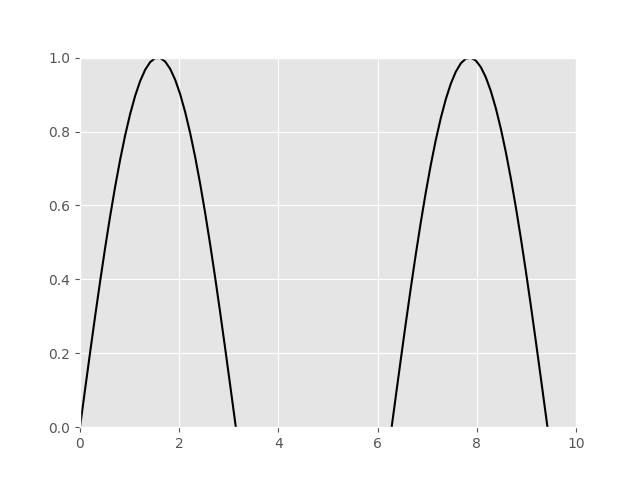

In [5]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

x = np.linspace(0, 10, 100)
y = np.sin(x)

fig, ax = plt.subplots()
line, = ax.plot(x, y, color='k')

def update(num, x, y, line):
    line.set_data(x[:num], y[:num])
    line.axes.axis([0, 10, 0, 1])
    return line,

ani = animation.FuncAnimation(fig, update, len(x), fargs=[x, y, line],
                              interval=25, blit=True)

Press the blue botton in the upper left corner to stop it running at any time.

There is also this although it seems outdated in regards to playing the animation directly in the Jupyter notebook page as shown by the last example:

http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-as-interactive-javascript-widgets/


Another approach is:  

[animatplot](https://animatplot.readthedocs.io/en/stable/gallery/Nuke.html)

----

Enjoy.